In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('River.csv')

# Check the columns and a few rows to identify the exact column names
print(data.columns)
print(data.head())  # Check a few rows of the dataset to ensure column names are correct


Index(['Index', 'pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine',
       'Total Dissolved Solids', 'Target'],
      dtype='object')
   Index        pH   Nitrate         Color  Turbidity      Odor  Chlorine  \
0      2  5.443762  3.816994  Light Yellow   0.319956  3.414619  3.560224   
1      7  7.258203  9.261676     Colorless   0.047803  3.144199  2.325094   
2      9  7.100650  3.620641     Colorless   0.050613  2.713379  2.284971   
3     20  9.686076  9.588365  Faint Yellow   0.040746  2.937562  3.338544   
4     44  5.400853  5.739483  Light Yellow   0.345791       NaN  2.770273   

   Total Dissolved Solids  Target  
0              570.054094       0  
1              214.553104       0  
2              113.909077       0  
3              270.921435       0  
4              478.567391       0  


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
data['Color'] = label_encoder.fit_transform(data['Color'])  # Example for the 'Color' column
# Apply the same for other categorical columns if needed (e.g., 'Odor', etc.)

# Now, proceed with defining the features (X) and target (Y)
X = data[['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids']].values
Y = data['Target'].values  # Assuming 'Target' is the water safety indicator (0 or 1)

# Convert to float32 for neural network compatibility
X = X.astype('float32')
Y = Y.astype('float32')


In [7]:
# Define the correct features and target based on the columns in the dataset
X = data[['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids']].values  # Modify with the correct column names
Y = data['Target'].values  # Assuming 'target' is the water safety indicator (0 or 1)

# Convert to float32 for neural network compatibility
X = X.astype('float32')
Y = Y.astype('float32')

In [8]:
# Scaling the features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Reshaping the data for RNN [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # Timesteps = 1

In [10]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [11]:
# Build the RNN model
model = Sequential()

# Add the RNN layer with 64 units and L2 regularization
model.add(SimpleRNN(units=64, activation='tanh',
                    input_shape=(X_train.shape[1], X_train.shape[2]),
                    kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization

# Add a Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model with 50 epochs and a batch size of 32
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7686 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 2/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7706 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 3/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7720 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 4/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7686 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 5/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7701 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 6/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7718 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 7/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7698 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 8/50
2580/2580 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7683 - loss: nan - val_accuracy: 0.7687 - val_loss: nan
Epoch 

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

807/807 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7700 - loss: nan
Test Loss: nan, Test Accuracy: 0.7730268239974976


In [15]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1)
predictions = (predictions > 0.5).astype('int32')  # Threshold of 0.5 for binary classification

807/807 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [16]:
# Print classification report
print(classification_report(Y_test, predictions))

# Print accuracy score
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     19941
         1.0       0.00      0.00      0.00      5855

    accuracy                           0.77     25796
   macro avg       0.39      0.50      0.44     25796
weighted avg       0.60      0.77      0.67     25796

Accuracy: 0.7730268258644751


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

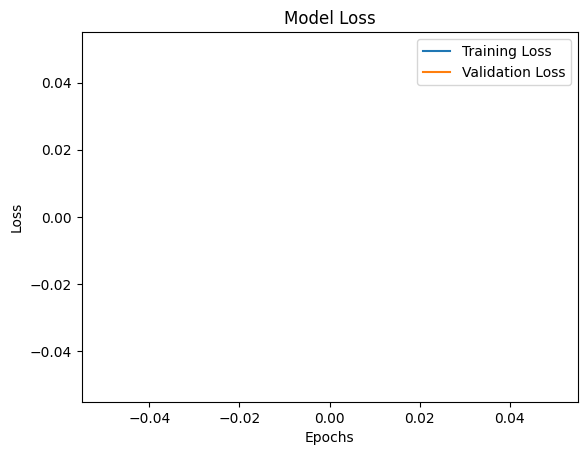

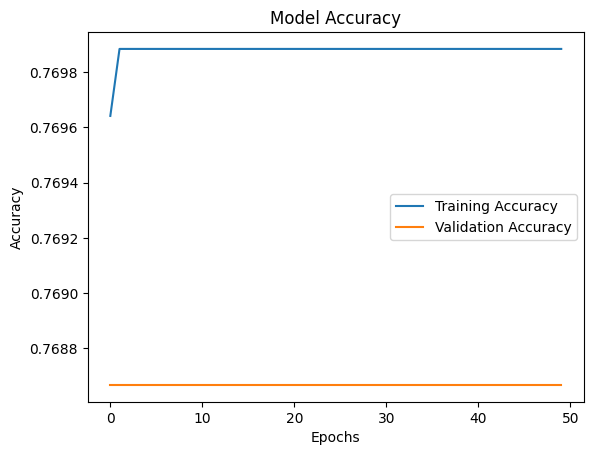

In [17]:
# Plot the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy during training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()